**Let's Start**

Step 1: Confirm Folder Paths & Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


**STEP 2: Set Your Working Directory**

This tells Colab where your project files are located.

In [2]:
import os

# Set path to your project folder
project_path = '/content/drive/MyDrive/Lifestyle_Health_Risk'
os.chdir(project_path)

# Confirm you're in the correct directory
print("Current working directory:", os.getcwd())


Current working directory: /content/drive/MyDrive/Lifestyle_Health_Risk


**STEP 3: Import Essential Libraries**

Let’s load the basic Python data science stack.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For model building later
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix


**STEP 4: Load and Explore the Dataset**

Load the CSV file you uploaded to your data/ folder.

In [4]:
# Load the dataset
data_path = 'data/Lifestyle_and_Health_Risk_Prediction_Synthetic_Dataset.csv'
df = pd.read_csv(data_path)

# View first few rows
df.head()


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk
0,56,67,195,low,6.1,medium,yes,yes,yes,office_worker,17.6,high
1,69,76,170,high,6.9,high,no,no,no,teacher,26.3,high
2,46,106,153,high,6.6,low,yes,no,no,artist,45.3,high
3,32,54,186,medium,8.5,medium,no,no,no,artist,15.6,low
4,60,98,195,high,8.0,low,no,no,yes,teacher,25.8,high


In [5]:
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   age           5000 non-null   int64  
 1   weight        5000 non-null   int64  
 2   height        5000 non-null   int64  
 3   exercise      5000 non-null   object 
 4   sleep         5000 non-null   float64
 5   sugar_intake  5000 non-null   object 
 6   smoking       5000 non-null   object 
 7   alcohol       5000 non-null   object 
 8   married       5000 non-null   object 
 9   profession    5000 non-null   object 
 10  bmi           5000 non-null   float64
 11  health_risk   5000 non-null   object 
dtypes: float64(2), int64(3), object(7)
memory usage: 468.9+ KB


,0
age,0
weight,0
height,0
exercise,0
sleep,0
sugar_intake,0
smoking,0
alcohol,0
married,0
profession,0


In [6]:
df.describe()

,age,weight,height,sleep,bmi
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000
mean,48.805600,77.359200,171.933200,6.997060,26.84388
std,17.906991,18.714567,15.822225,1.432849,8.25249
min,18.000000,45.000000,145.000000,3.000000,11.40000
25%,34.000000,61.000000,158.000000,6.000000,20.30000
50%,49.000000,77.000000,171.500000,7.000000,26.00000
75%,64.000000,94.000000,186.000000,8.000000,32.40000
max,79.000000,109.000000,199.000000,10.000000,51.40000


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
4995,False
4996,False
4997,False
4998,False


**STEP 5: Data Cleaning**

You’ll handle missing data, duplicates, or inconsistent entries here.

In this case, no missing value or dupplicated. Move to next step.

In [8]:
# Drop duplicates
df.drop_duplicates(inplace=True)

# Fill missing values (example)
df.fillna(df.median(), inplace=True)


TypeError: Cannot convert [['low' 'high' 'high' ... 'none' 'medium' 'high']
 ['medium' 'high' 'low' ... 'high' 'medium' 'medium']
 ['yes' 'no' 'yes' ... 'yes' 'no' 'no']
 ...
 ['yes' 'no' 'no' ... 'yes' 'yes' 'yes']
 ['office_worker' 'teacher' 'artist' ... 'engineer' 'doctor' 'driver']
 ['high' 'high' 'high' ... 'high' 'low' 'low']] to numeric

**STEP 6: Exploratory Data Analysis (EDA)**

Visualize relationships, distributions, and target patterns:

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look better
sns.set(style="whitegrid")



**Plot distributions of numerical features**

This helps you understand how each numeric variable is spread.

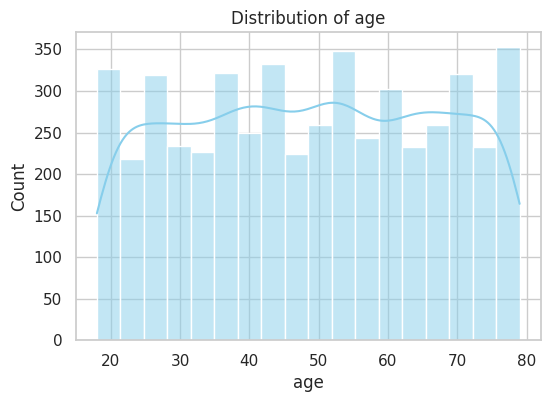

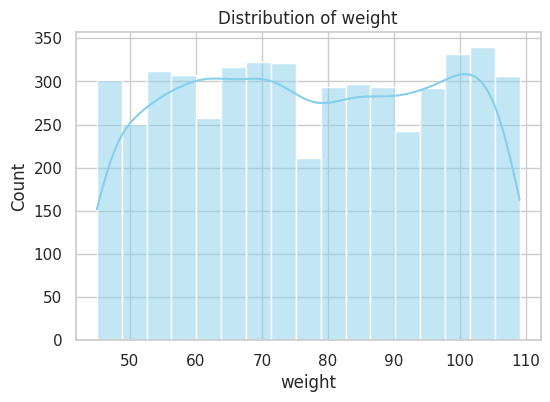

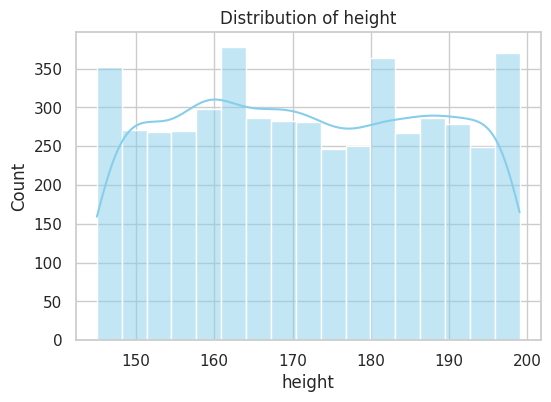

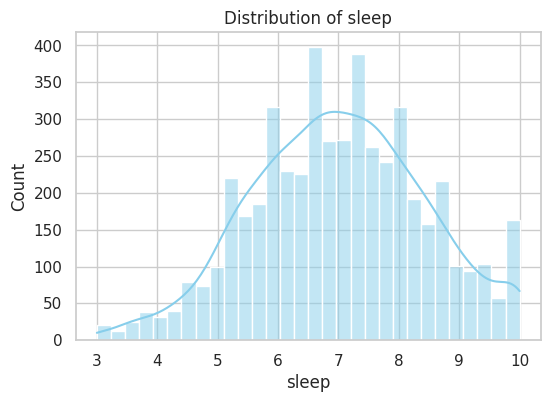

In [10]:
numeric_cols = ['age', 'weight', 'height', 'sleep']  # adjust based on your dataset

for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


**Relationship between two continuous variables**

Example: height vs. weight relationship

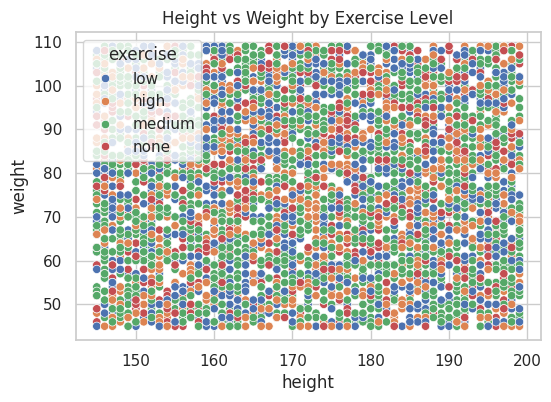

In [11]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=df, x='height', y='weight', hue='exercise')
plt.title('Height vs Weight by Exercise Level')
plt.show()


**Boxplots to detect outliers and compare groups**

Example: comparing sleep hours by exercise habit

/tmp/ipython-input-3364482577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='exercise', y='sleep', palette='coolwarm')


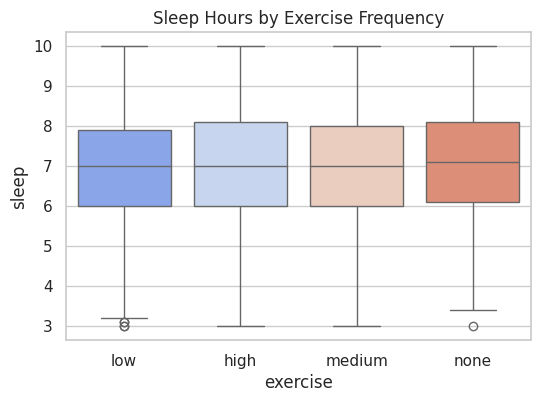

In [12]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x='exercise', y='sleep', palette='coolwarm')
plt.title('Sleep Hours by Exercise Frequency')
plt.show()


**Correlation heatmap**

This helps identify which variables are related numerically.

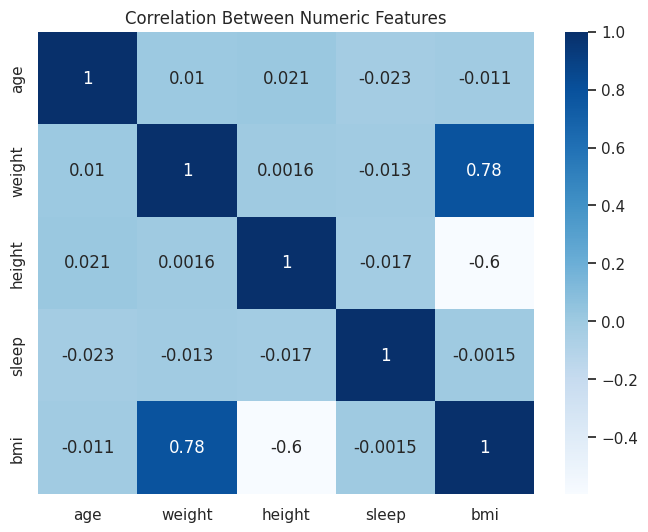

In [13]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues')
plt.title('Correlation Between Numeric Features')
plt.show()

**Visualize your target variable**

Example (replace health_risk with your actual target column name):

/tmp/ipython-input-1886215309.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='health_risk', palette='Set2')


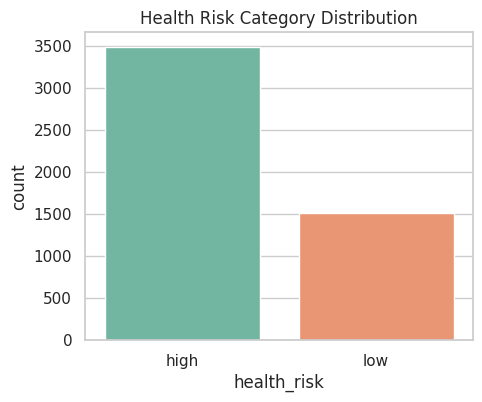

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(data=df, x='health_risk', palette='Set2')
plt.title('Health Risk Category Distribution')
plt.show()


**Pairplot (optional, for overall pattern)**

This creates a grid of scatterplots among numerical features.

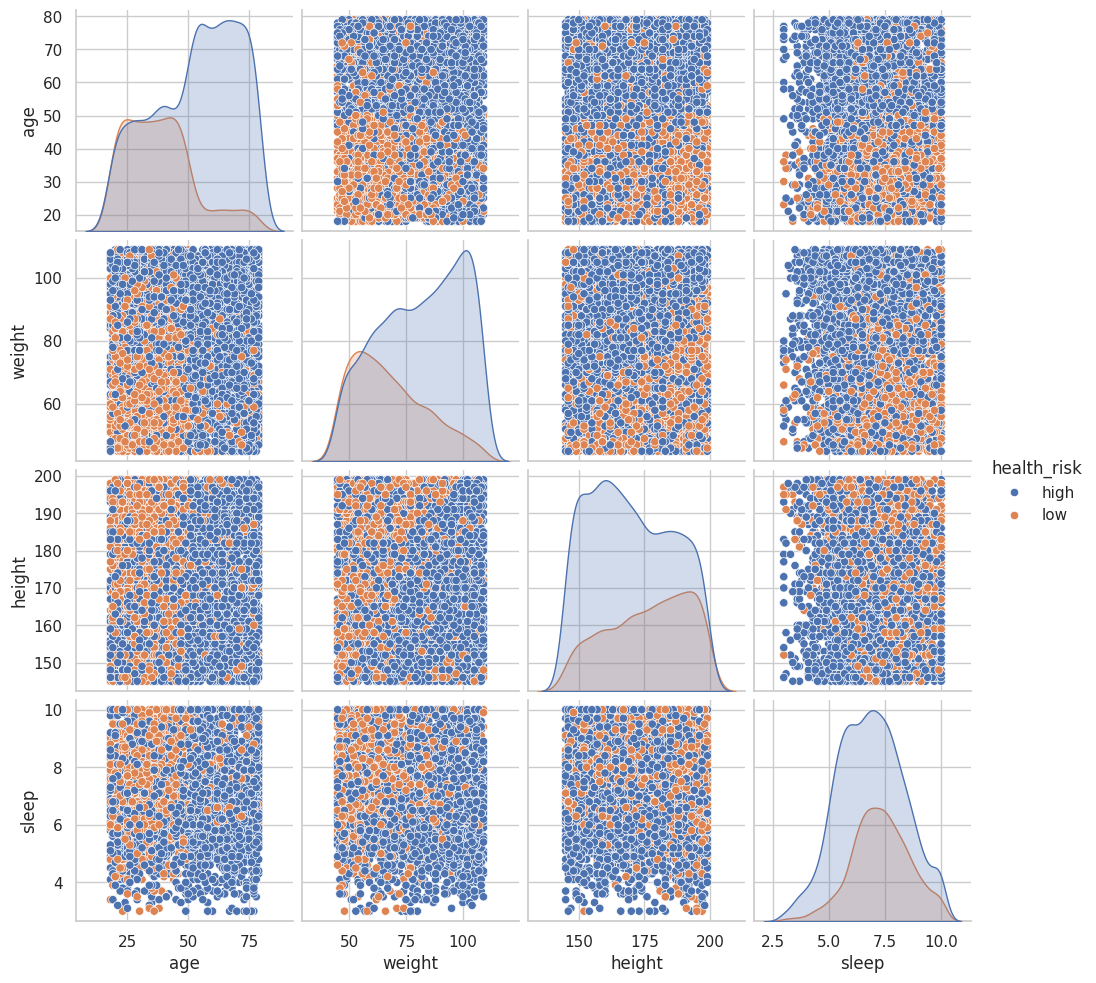

In [15]:
sns.pairplot(df[numeric_cols + ['health_risk']], hue='health_risk')
plt.show()

**Step 7: Feature Engineering**

Goal:
To create meaningful new features and transform existing ones to help your model learn better patterns.

**BMI Category**

We can categorize BMI into health groups.

In [16]:
def bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 24.9:
        return 'Normal'
    elif 25 <= bmi < 29.9:
        return 'Overweight'
    else:
        return 'Obese'

df['bmi_category'] = df['bmi'].apply(bmi_category)


**Convert Height and Weight Relationship**

You already have BMI, but we can add:

Height in meters

Weight-to-height ratio

In [17]:
df['height_m'] = df['height'] / 100  # assuming height is in cm
df['weight_height_ratio'] = df['weight'] / df['height_m']


In [18]:
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
print(categorical_cols)


Index(['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married',
       'profession', 'health_risk', 'bmi_category'],
      dtype='object')


In [19]:
for col in categorical_cols:
    print(f"Column: {col}")
    print(df[col].unique())
    print("-" * 50)


Column: exercise
['low' 'high' 'medium' 'none']
--------------------------------------------------
Column: sugar_intake
['medium' 'high' 'low']
--------------------------------------------------
Column: smoking
['yes' 'no']
--------------------------------------------------
Column: alcohol
['yes' 'no']
--------------------------------------------------
Column: married
['yes' 'no']
--------------------------------------------------
Column: profession
['office_worker' 'teacher' 'artist' 'farmer' 'driver' 'engineer' 'student'
 'doctor']
--------------------------------------------------
Column: health_risk
['high' 'low']
--------------------------------------------------
Column: bmi_category
['Underweight' 'Overweight' 'Obese' 'Normal']
--------------------------------------------------


**Refine the Lifestyle Score Function**

Now we’ll use your actual categories (low, medium, high, none).

We’ll assign health-based scores (higher = healthier lifestyle):

| Factor           | Category                        | Score |
| ---------------- | ------------------------------- | ----- |
| **Exercise**     | none:0, low:1, medium:2, high:3 |       |
| **Sleep**        | ideal (7–9h): 2, 5–6 or 10h: 1  |       |
| **Sugar Intake** | high:0, medium:1, low:2         |       |
| **Smoking**      | yes:0, no:2                     |       |
| **Alcohol**      | yes:0, no:2                     |       |


In [20]:
def lifestyle_score(row):
    score = 0

    # Exercise
    if row['exercise'] == 'high':
        score += 3
    elif row['exercise'] == 'medium':
        score += 2
    elif row['exercise'] == 'low':
        score += 1
    # none = 0

    # Sleep
    if 7 <= row['sleep'] <= 9:
        score += 2
    elif 5 <= row['sleep'] < 7 or 9 < row['sleep'] <= 10:
        score += 1

    # Sugar Intake
    if row['sugar_intake'] == 'low':
        score += 2
    elif row['sugar_intake'] == 'medium':
        score += 1

    # Smoking
    if row['smoking'] == 'no':
        score += 2

    # Alcohol
    if row['alcohol'] == 'no':
        score += 2

    return score

df['lifestyle_score'] = df.apply(lifestyle_score, axis=1)


**Encode Categorical Columns**

Since your categorical columns are nominal (no natural order), use LabelEncoder for now — simple and suitable for most models.

In [21]:
from sklearn.preprocessing import LabelEncoder

label_cols = ['exercise', 'sugar_intake', 'smoking', 'alcohol', 'married',
              'profession', 'bmi_category', 'health_risk']

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])


In [22]:
df.head()


,age,weight,height,exercise,sleep,sugar_intake,smoking,alcohol,married,profession,bmi,health_risk,bmi_category,height_m,weight_height_ratio,lifestyle_score
0,56,67,195,1,6.1,2,1,1,1,5,17.6,0,3,1.95,34.358974,3
1,69,76,170,0,6.9,0,0,0,0,7,26.3,0,2,1.70,44.705882,8
2,46,106,153,0,6.6,1,1,0,0,0,45.3,0,1,1.53,69.281046,8
3,32,54,186,2,8.5,2,0,0,0,0,15.6,1,3,1.86,29.032258,9
4,60,98,195,0,8.0,1,0,0,1,7,25.8,0,2,1.95,50.256410,11


**Save Processed Data**

In [23]:
df.to_csv('/content/drive/MyDrive/Lifestyle_Health_Risk/data/processed_lifestyle_health.csv', index=False)
print("✅ Feature-engineered dataset saved successfully!")


✅ Feature-engineered dataset saved successfully!


# **Model Building**

**Build a Baseline Model First**

Start simple to establish a baseline performance.

**Import Libraries**

Place this after your data preprocessing step (where you encoded categorical columns and split features/target).

In [24]:
# Step 1: Import baseline modeling libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.dummy import DummyClassifier



**Define X and y**

Let’s say your dataset is stored in a DataFrame called df, and the column you want to predict is called health_risk (you can replace it with your actual target column name).

In [25]:
# Step 1: Define features (X) and target (y)
X = df.drop('health_risk', axis=1)  # all columns except target
y = df['health_risk']               # target column


**Split the Data**

If you haven’t already done so, split your features (X) and target (y):

In [26]:
# Step 2: Split dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


This will split:

80% of the data into X_train, y_train

20% into X_test, y_test

**Quick Check**

You can confirm everything worked with:

In [27]:
X_train.shape, X_test.shape


((4000, 15), (1000, 15))

**Train a Dummy (Baseline) Model**

The DummyClassifier gives us a simple reference — for example, always predicting the most common class.

In [28]:
# Step 3: Train a baseline dummy model
dummy = DummyClassifier(strategy='most_frequent')
dummy.fit(X_train, y_train)


DummyClassifier(strategy='most_frequent')

**Evaluate Baseline Performance**

In [29]:
# Step 4: Predict and evaluate
y_pred_dummy = dummy.predict(X_test)

print("Baseline Accuracy:", accuracy_score(y_test, y_pred_dummy))
print("\nClassification Report:\n", classification_report(y_test, y_pred_dummy))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_dummy))


Baseline Accuracy: 0.708

Classification Report:
               precision    recall  f1-score   support

           0       0.71      1.00      0.83       708
           1       0.00      0.00      0.00       292

    accuracy                           0.71      1000
   macro avg       0.35      0.50      0.41      1000
weighted avg       0.50      0.71      0.59      1000


Confusion Matrix:
 [[708   0]
 [292   0]]


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


What’s Happening

This is a classic case of class imbalance.
Your model learned to always predict Class 0 (the majority) because that alone gives it 71% accuracy — even though it ignores all Class 1 examples.

So:

Accuracy looks decent.

But model performance for minority class (Class 1) is terrible (0 recall, 0 precision).

This means it’s useless for detecting Class 1, which might be your target class (e.g., “high-risk”, “disease positive”, etc.).

**Results by Class**
Class	Precision	Recall	F1-score	Interpretation
0	0.71	1.00	0.83	The model is very confident in predicting Class 0 — it catches almost all true Class 0 cases (100% recall).
1	0.00	0.00	0.00	The model completely failed to detect Class 1 — it never predicted any sample as Class 1.

Compare All Methods

You can compare three runs:

Baseline (no balancing)

Class Weight Balancing

SMOTE Oversampling

This helps you see which method improves your recall and F1-score for Class 1 the most

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
import pandas as pd

results = []

# 1️⃣ Baseline Model
model_baseline = RandomForestClassifier(random_state=42)
model_baseline.fit(X_train, y_train)
y_pred_base = model_baseline.predict(X_test)
report_base = classification_report(y_test, y_pred_base, output_dict=True)
results.append({
    'Model': 'Baseline',
    'Accuracy': accuracy_score(y_test, y_pred_base),
    'Precision_0': report_base['0']['precision'],
    'Recall_0': report_base['0']['recall'],
    'F1_0': report_base['0']['f1-score'],
    'Precision_1': report_base['1']['precision'],
    'Recall_1': report_base['1']['recall'],
    'F1_1': report_base['1']['f1-score']
})

# 2️⃣ Class Weight Balanced
model_weighted = RandomForestClassifier(random_state=42, class_weight='balanced')
model_weighted.fit(X_train, y_train)
y_pred_weight = model_weighted.predict(X_test)
report_weight = classification_report(y_test, y_pred_weight, output_dict=True)
results.append({
    'Model': 'Class Weight Balanced',
    'Accuracy': accuracy_score(y_test, y_pred_weight),
    'Precision_0': report_weight['0']['precision'],
    'Recall_0': report_weight['0']['recall'],
    'F1_0': report_weight['0']['f1-score'],
    'Precision_1': report_weight['1']['precision'],
    'Recall_1': report_weight['1']['recall'],
    'F1_1': report_weight['1']['f1-score']
})

# 3️⃣ SMOTE Oversampling
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_res, y_train_res)
y_pred_smote = model_smote.predict(X_test)
report_smote = classification_report(y_test, y_pred_smote, output_dict=True)
results.append({
    'Model': 'SMOTE Oversampling',
    'Accuracy': accuracy_score(y_test, y_pred_smote),
    'Precision_0': report_smote['0']['precision'],
    'Recall_0': report_smote['0']['recall'],
    'F1_0': report_smote['0']['f1-score'],
    'Precision_1': report_smote['1']['precision'],
    'Recall_1': report_smote['1']['recall'],
    'F1_1': report_smote['1']['f1-score']
})

# Combine results into a comparison table
comparison_df = pd.DataFrame(results)
comparison_df = comparison_df.round(3)
print(comparison_df)


                   Model  Accuracy  Precision_0  Recall_0   F1_0  Precision_1  \
0               Baseline     0.987        0.994     0.987  0.991        0.970   
1  Class Weight Balanced     0.988        0.990     0.993  0.992        0.983   
2     SMOTE Oversampling     0.967        0.993     0.960  0.976        0.911   

   Recall_1   F1_1  
0     0.986  0.978  
1     0.976  0.979  
2     0.983  0.946  


**Evaluate Your Random Forest Model**
🧠 Objective

You’ll generate:

a classification report (Precision, Recall, F1)

a confusion matrix

an ROC curve + AUC score

**Make Predictions**

Before generating a classification report, you need to use your trained model to predict on the test set.

Add this line right before your classification report code:

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
✅ Best Hyperparameters: {'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
📊 Classification Report (Optimized Random Forest):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       708
           1       0.99      0.98      0.98       292

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000



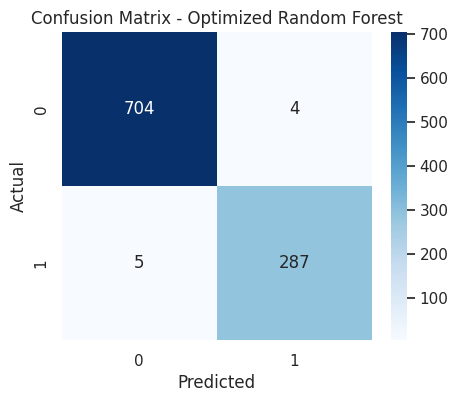

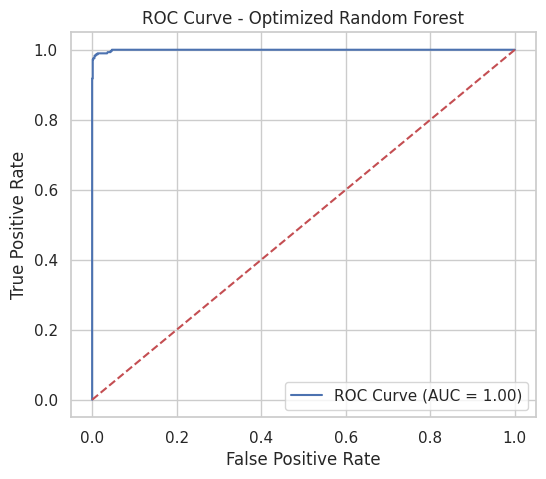

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Initialize the model
rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# Initialize GridSearchCV
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=5,
    scoring='f1',  # optimize for minority class F1
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters
print("✅ Best Hyperparameters:", grid_search.best_params_)

# Best model
best_rf = grid_search.best_estimator_

# Evaluate on test set
y_pred_best = best_rf.predict(X_test)
y_pred_prob_best = best_rf.predict_proba(X_test)[:, 1]

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

print("📊 Classification Report (Optimized Random Forest):")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_best)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Optimized Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_best)
roc_auc = roc_auc_score(y_test, y_pred_prob_best)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0,1], [0,1], 'r--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Optimized Random Forest")
plt.legend()
plt.show()


**Confirm Model Stability**

Before finalizing, check model generalization and feature importance to ensure that:

It’s not overfitting.

It’s learning from meaningful features.

You can use this code:

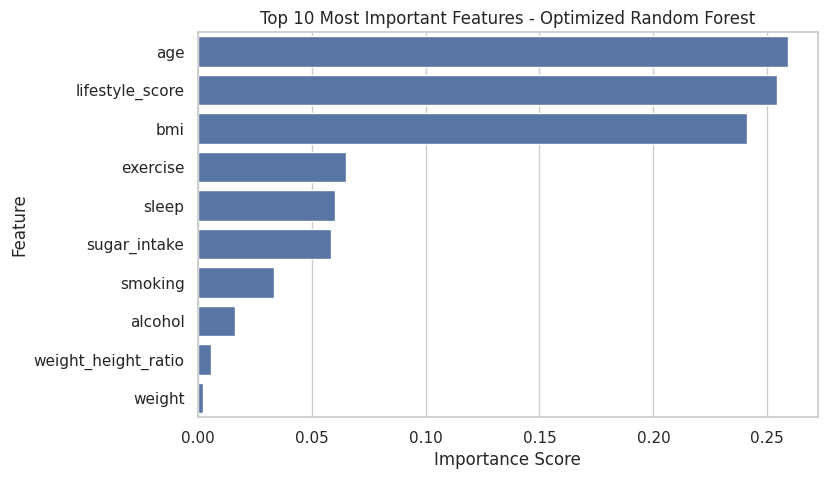

In [32]:
# ✅ Feature Importance
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_rf.feature_importances_, index=X_train.columns)
feature_importances = feature_importances.sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=feature_importances[:10], y=feature_importances.index[:10])
plt.title("Top 10 Most Important Features - Optimized Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


**Save the Model for Later Use**

Once confirmed, save it as a .pkl file for easy reuse:

In [33]:
import joblib

joblib.dump(best_rf, '/content/drive/MyDrive/Lifestyle_Health_Risk/models/optimized_random_forest.pkl')
print("✅ Model saved successfully!")


✅ Model saved successfully!


**You can later load it again with:**

model = joblib.load('/content/drive/MyDrive/Lifestyle_Health_Risk/models/optimized_random_forest.pkl')


Next Step Options

Now that you have a strong model, you have two possible next directions:

Option 1: Model Explainability (recommended next)

Understand why your model predicts “risk” for each person.

Use SHAP or LIME for interpretability.

This is great for explaining results to non-technical stakeholders.

Option 2: Model Deployment

Convert it into an app using Streamlit or Flask.

Allow users to input lifestyle data and predict health risk.

Perfect! Let’s dive into Model Explainability — this will help you understand why your Random Forest predicts someone as high-risk or low-risk.

We’ll use SHAP (SHapley Additive exPlanations), which is widely used for tree-based models like Random Forests. It shows feature importance at both global and individual levels.

**Install and Import SHAP**

In [34]:
# Install SHAP if not already installed
!pip install shap --quiet

import shap
import matplotlib.pyplot as plt
import pandas as pd


**Create SHAP Explainer**

In [ ]:
# Create TreeExplainer for Random Forest
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)


shap_values[1] corresponds to the high-risk class (class 1)

shap_values[0] corresponds to the low-risk class (class 0)

**Global Feature Importance**

This tells you which features are most influential overall:

In [ ]:
import shap

# Assuming shap_values is a numpy array of shape (15, 2)
# And X_test is a DataFrame with 15 columns

# Choose class 1 (high-risk)
shap_class1 = shap_values[:, 1]

# Create a bar plot
shap.summary_plot(shap_class1, feature_names=X_test.columns, plot_type="bar", max_display=10)



In [ ]:
print(X_test.shape)
print(shap_values[1].shape)


**Create a Deployment Environment**

Make sure your environment has the necessary packages:

In [ ]:
pip install streamlit pandas scikit-learn joblib


**Prepare a Deployment Script**

Create a new Python file, e.g., app.py, in the same project folder.

Here’s a template you can use:

In [ ]:
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load('/content/drive/MyDrive/Lifestyle_Health_Risk/models/optimized_random_forest.pkl')

st.title("Lifestyle & Health Risk Prediction")

st.write("""
Enter your information below to predict your health risk.
""")

# Create input fields
age = st.number_input("Age", min_value=0, max_value=120, value=25)
weight = st.number_input("Weight (kg)", min_value=0, max_value=300, value=70)
height = st.number_input("Height (cm)", min_value=50, max_value=250, value=170)

exercise = st.selectbox("Exercise Level", ["none", "low", "medium", "high"])
sleep = st.number_input("Average Sleep Hours per Day", min_value=0.0, max_value=24.0, value=7.0)
sugar_intake = st.selectbox("Sugar Intake", ["low", "medium", "high"])
smoking = st.selectbox("Smoking", ["no", "yes"])
alcohol = st.selectbox("Alcohol Consumption", ["no", "yes"])
married = st.selectbox("Married", ["no", "yes"])
profession = st.selectbox("Profession", ["office_worker", "teacher", "artist", "farmer", "driver", "engineer"])

# Collect inputs into a DataFrame
input_data = pd.DataFrame({
    "age": [age],
    "weight": [weight],
    "height": [height],
    "exercise": [exercise],
    "sleep": [sleep],
    "sugar_intake": [sugar_intake],
    "smoking": [smoking],
    "alcohol": [alcohol],
    "married": [married],
    "profession": [profession]
})

# Predict when button is clicked
if st.button("Predict Risk"):
    prediction = model.predict(input_data)
    risk = "High Risk" if prediction[0] == 1 else "Low Risk"
    st.success(f"Predicted Health Risk: {risk}")


**Create your app.py there and run it.**
Here’s a step-by-step setup for Colab:

In [ ]:
%cd /content/drive/MyDrive/Lifestyle_Health_Risk/app


**Create app.py**

In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib
from sklearn.preprocessing import LabelEncoder

# 1️⃣ Load your trained model
model = joblib.load('/content/drive/MyDrive/Lifestyle_Health_Risk/models/optimized_random_forest.pkl')

# 2️⃣ Define LabelEncoders for categorical features (must match training)
exercise_encoder = LabelEncoder()
exercise_encoder.classes_ = ['high','low','medium','none']

sugar_encoder = LabelEncoder()
sugar_encoder.classes_ = ['high','low','medium']

smoking_encoder = LabelEncoder()
smoking_encoder.classes_ = ['no','yes']

alcohol_encoder = LabelEncoder()
alcohol_encoder.classes_ = ['no','yes']

married_encoder = LabelEncoder()
married_encoder.classes_ = ['no','yes']

profession_encoder = LabelEncoder()
profession_encoder.classes_ = ['artist','driver','engineer','farmer','office_worker','teacher']

bmi_cat_encoder = LabelEncoder()
bmi_cat_encoder.classes_ = ['normal','obese','overweight','underweight']

# 3️⃣ Streamlit input form for raw features
st.title("Lifestyle & Health Risk Prediction")

age = st.number_input("Age", min_value=0, max_value=120, value=30)
weight = st.number_input("Weight (kg)", min_value=0, max_value=300, value=70)
height = st.number_input("Height (cm)", min_value=50, max_value=250, value=170)
exercise = st.selectbox("Exercise level", ['none','low','medium','high'])
sleep = st.number_input("Sleep hours", min_value=0, max_value=24, value=7)
sugar_intake = st.selectbox("Sugar intake", ['low','medium','high'])
smoking = st.selectbox("Smoking", ['no','yes'])
alcohol = st.selectbox("Alcohol", ['no','yes'])
married = st.selectbox("Married", ['no','yes'])
profession = st.selectbox("Profession", ['office_worker', 'teacher', 'artist', 'farmer', 'driver', 'engineer'])

# 4️⃣ Convert inputs into a DataFrame
input_data = pd.DataFrame({
    'age':[age],
    'weight':[weight],
    'height':[height],
    'exercise':[exercise],
    'sleep':[sleep],
    'sugar_intake':[sugar_intake],
    'smoking':[smoking],
    'alcohol':[alcohol],
    'married':[married],
    'profession':[profession]
})

# 5️⃣ Compute derived features
input_data['height_m'] = input_data['height'] / 100
input_data['bmi'] = input_data['weight'] / (input_data['height_m'] ** 2)

def bmi_category(bmi):
    if bmi < 18.5:
        return 'underweight'
    elif bmi < 25:
        return 'normal'
    elif bmi < 30:
        return 'overweight'
    else:
        return 'obese'

input_data['bmi_category'] = input_data['bmi'].apply(bmi_category)
input_data['weight_height_ratio'] = input_data['weight'] / input_data['height']

# Example lifestyle score (adjust as per your training logic)
exercise_map = {'none':0,'low':1,'medium':2,'high':3}
sugar_map = {'low':0,'medium':1,'high':2}
input_data['lifestyle_score'] = exercise_map[exercise] + sleep - sugar_map[sugar_intake]

# 6️⃣ Encode categorical features safely
# Make sure to fit LabelEncoders in the correct order
exercise_encoder = LabelEncoder()
exercise_encoder.fit(['none','low','medium','high'])

sugar_encoder = LabelEncoder()
sugar_encoder.fit(['low','medium','high'])

smoking_encoder = LabelEncoder()
smoking_encoder.fit(['no','yes'])

alcohol_encoder = LabelEncoder()
alcohol_encoder.fit(['no','yes'])

married_encoder = LabelEncoder()
married_encoder.fit(['no','yes'])

profession_encoder = LabelEncoder()
profession_encoder.fit(['office_worker','teacher','artist','farmer','driver','engineer'])

bmi_cat_encoder = LabelEncoder()
bmi_cat_encoder.fit(['underweight','normal','overweight','obese'])

# Transform columns safely using .values.ravel()
input_data['exercise'] = exercise_encoder.transform(input_data['exercise'].values.ravel())
input_data['sugar_intake'] = sugar_encoder.transform(input_data['sugar_intake'].values.ravel())
input_data['smoking'] = smoking_encoder.transform(input_data['smoking'].values.ravel())
input_data['alcohol'] = alcohol_encoder.transform(input_data['alcohol'].values.ravel())
input_data['married'] = married_encoder.transform(input_data['married'].values.ravel())
input_data['profession'] = profession_encoder.transform(input_data['profession'].values.ravel())
input_data['bmi_category'] = bmi_cat_encoder.transform(input_data['bmi_category'].values.ravel())


# 7️⃣ Ensure feature order matches the model
input_data = input_data[model.feature_names_in_]

# 8️⃣ Make prediction with colored output
if st.button("Predict"):
    prediction = model.predict(input_data)

    # Map numeric prediction to human-readable label and color
    risk_map = {
        1: ("Low Risk", "green"),
        0: ("High Risk", "red")
    }

    risk_label, color = risk_map.get(prediction[0], ("Unknown", "gray"))

    # Display as a colored badge
    st.markdown(
        f"<h3 style='color:{color};'>Predicted Risk: {risk_label}</h3>",
        unsafe_allow_html=True
    )








**Run the Streamlit app in Colab**

Colab cannot show localhost directly, so we use pyngrok to create a public URL:

In [ ]:
!rm -f /root/.config/ngrok/ngrok.yml


In [ ]:
!ngrok authtoken 34Ke6UsOCR8GdoVRtEzoGlYOvls_4GAA8Z2sLPMYa1DifUPkg


**Remark: Free ngrok accounts can run at most 3 tunnels at the same time.**

So if currently have 3 active tunnels — any additional attempt fails with a 502 Bad Gateway. Need to close active tunnels.

In [ ]:
from pyngrok import ngrok
ngrok.kill()  # closes all active tunnels


In [ ]:
from pyngrok import ngrok

# Make sure in the app folder
%cd /content/drive/MyDrive/Lifestyle_Health_Risk/app

# Launch Streamlit in the background
get_ipython().system_raw("streamlit run app.py &")

# Create ngrok tunnel to default Streamlit port
public_url = ngrok.connect(8501)
print("Your Streamlit app is live at:", public_url)




In [ ]:
print(model.feature_names_in_)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

# Change this path to your actual folder
%cd /content/drive/MyDrive/Lifestyle_Health_Risk

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Lifestyle_Health_Risk


In [ ]:
# Step 1: Configure your GitHub info
!git config --global user.email "cjchin1015@gmail.com"
!git config --global user.name "cjchin"
